<a href="https://colab.research.google.com/github/Mosescatty/InternCareer/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import dependencies**

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import drive

**Data Collection & preprocessing**

In [78]:
# load the data from csv file to Pandas DataFrame
titanic_df = pd.read_csv('/content/train.csv')

In [79]:
# printing the first 5 rows of the dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
# number of rows and Columns
titanic_df.shape

(891, 12)

In [81]:
# getting some informations about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
# check the number of missing values in each column
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*Handling the missing values*

In [83]:
# drop the "Cabin" column from the dataframe
titanic_df = titanic_df.drop(columns='Cabin', axis=1)

In [84]:
# replacing the missing values in "Age" column with mean value
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [85]:
# finding the mode value of "Embarked" column
print(titanic_df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [86]:
print(titanic_df['Embarked'].mode()[0])

S


In [87]:
# replacing the missing values in "Embarked" column with mode value
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [88]:
# check the number of missing values in each column
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

*Data Analysis*

In [89]:
# getting some statistical measures about the data
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
# finding the number of people survived and not survived
titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

*Data visualization*

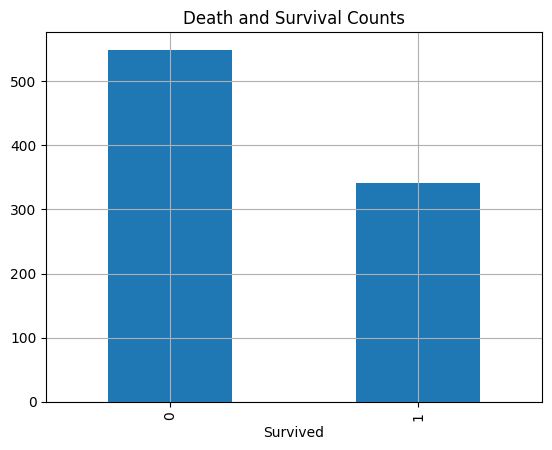

In [91]:
# making a count plot for "Survived" column
titanic_df['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts',grid=True)
plt.show()

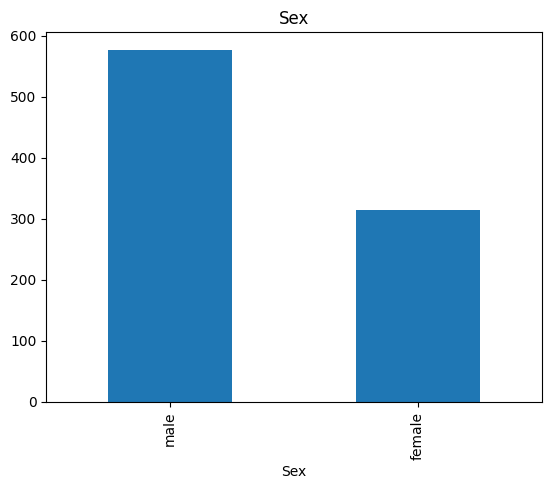

In [92]:
# making a count plot for "Sex" column
titanic_df['Sex'].value_counts().plot(kind='bar', title='Sex')
plt.show()

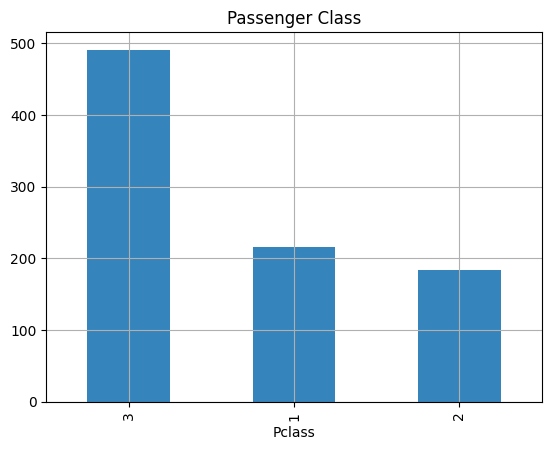

In [93]:
# Making a count plot for 'Pclass' column

titanic_df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class',alpha=0.90,grid=True)
plt.show()

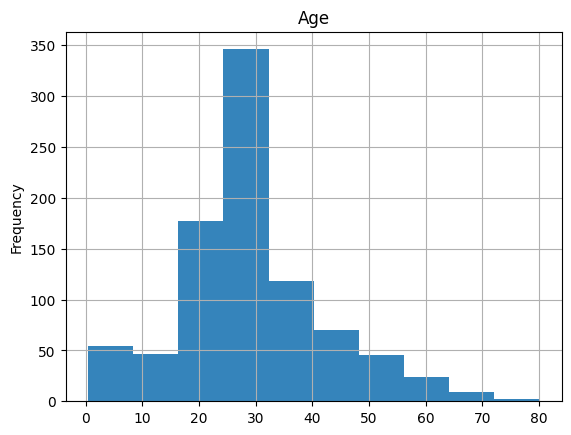

In [94]:
# Making a histogram for 'Age' column

titanic_df['Age'].plot(kind='hist',title='Age',alpha=0.90,grid=True)
plt.show()

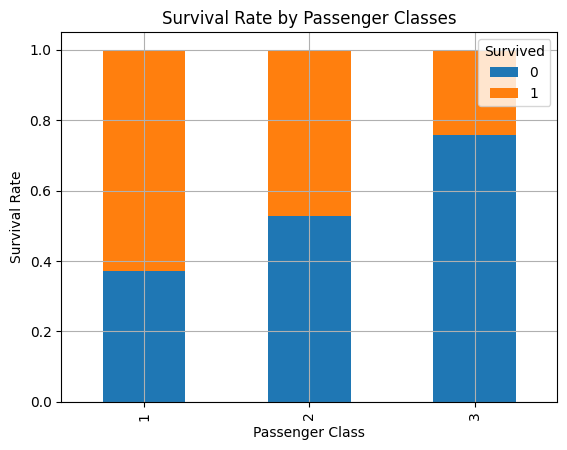

In [95]:
# number of survivers Pclass wise

rel_1=pd.crosstab(titanic_df['Pclass'],titanic_df['Survived'])
rel_1_normalize = rel_1.div(rel_1.sum(1).astype(float), axis=0)
rel_1_normalize.plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=True,grid=True)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [96]:
# Making a  map Sex from a string to a number
sexes = sorted(titanic_df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
titanic_df['Sex_Val'] = titanic_df['Sex'].map(genders_mapping).astype(int)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


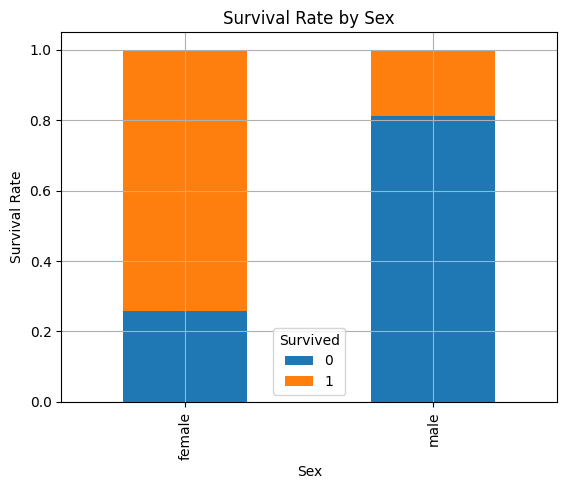

In [97]:
# Making a plot for survied "Age" wise
rel_2=pd.crosstab(titanic_df['Sex'],titanic_df['Survived'])
rel_2_normalize=rel_2.div(rel_2.sum(1).astype(float),axis=0)
rel_2_normalize.plot(kind='bar',title='Survival Rate by Sex',stacked=True,grid=True)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

In [98]:
# Get the unique values of Pclass:
passenger_classes = sorted(titanic_df['Pclass'].unique())
passenger_classes

[1, 2, 3]

In [99]:
# get Count males and females in each Pclass:
for i in passenger_classes:
        print ('M : ',i ,len(titanic_df[(titanic_df['Sex'] == 'male')  & (titanic_df['Pclass'] == i)]))
        print ('F : ',i ,len(titanic_df[(titanic_df['Sex'] =='female') & (titanic_df['Pclass'] == i)]))
male=titanic_df[titanic_df['Sex']=='male']
female=titanic_df[titanic_df['Sex']=='female']

M :  1 122
F :  1 94
M :  2 108
F :  2 76
M :  3 347
F :  3 144


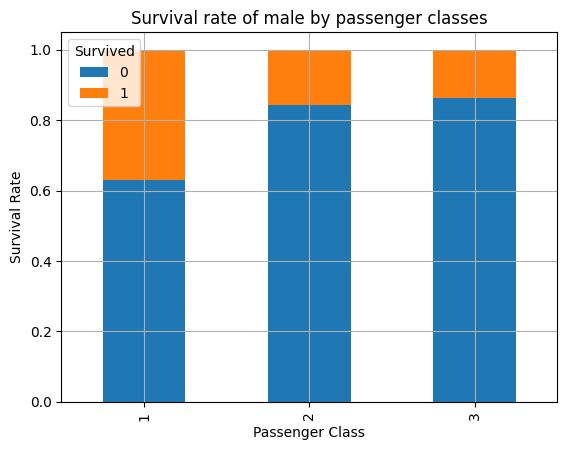

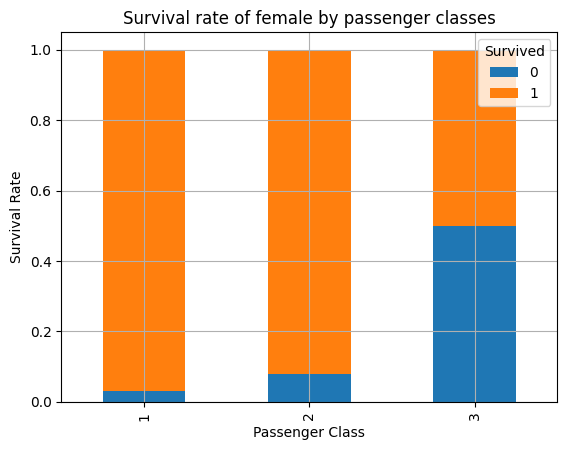

In [100]:
# Plot survival rate by Sex and Pclass:

male_rel=pd.crosstab(male['Pclass'],male['Survived'])
male_rel_normalize=male_rel.div(male_rel.sum(1).astype(float),axis=0)
male_rel_normalize.plot(kind='bar',title='Survival rate of male by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
female_rel=pd.crosstab(female['Pclass'],female['Survived'])
female_rel_normalize=female_rel.div(female_rel.sum(1).astype(float),axis=0)
female_rel_normalize.plot(kind='bar',title='Survival rate of female by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

**Separating features & Target**

In [101]:
titanic_df.dtypes[titanic_df.dtypes.map(lambda x: x == 'object')]
titanic_df = titanic_df.drop(columns = ['PassengerId','Name','Ticket','Parch','Embarked','SibSp','Sex'],axis=1)
titanic_df.head(10)


,Survived,Pclass,Age,Fare,Sex_Val
0,0,3,22.000000,7.2500,1
1,1,1,38.000000,71.2833,0
2,1,3,26.000000,7.9250,0
3,1,1,35.000000,53.1000,0
4,0,3,35.000000,8.0500,1
5,0,3,29.699118,8.4583,1
6,0,1,54.000000,51.8625,1
7,0,3,2.000000,21.0750,1
8,1,3,27.000000,11.1333,0
9,1,2,14.000000,30.0708,0


In [138]:
df=titanic_df.values

In [103]:
clf = GaussianNB()


In [104]:
train_features = df[:, 1:]
train_target = df[:, 0]

In [129]:
# Load test data
df_test1 = pd.read_csv('/content/test.csv')

In [127]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [139]:
# Assuming train_features and train_target are already defined
train_x, test_x, train_y, test_y = train_test_split(train_features, train_target, test_size=0.20, random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 4) (891,)
(712, 4) (712,)
(179, 4) (179,)


In [ ]:
# Initialize and train the model
clf = GaussianNB()
clf.fit(train_x, train_y)

In [130]:
# Make predictions on the test set
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
print ("Naive Bayes Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Naive Bayes Accuracy = 0.78


In [111]:

logreg = LogisticRegression()
logreg.fit(train_x, train_y)
predict_y = logreg.predict(test_x)
print ("Regression Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Regression Accuracy = 0.81
